# measures and fire

The purpose of the notebook is to visualise the impact of different type of fire on the system.
By different type of fire, we mean the modelisation of the fire, the law it follow, the different parameter of the law, the amplitude ...

In [7]:
exec(open("objet.py").read(), globals())

In [8]:
Compute_variability = ["always", "until", "only", "10%"]

In [30]:
def all_measure(Number_of_simulation = 100, mean = True, **kwargs):
    """solve the system several times with different perturbation in order to make an average"""
    ##### Number_of_simulation : between 10 and 1000 usually 100
    Collapse = np.zeros(Number_of_simulation)
    Variability_always = np.zeros_like(Collapse)
    Variability_until = np.zeros_like(Collapse)
    Variability_only = np.zeros_like(Collapse)
    Variability_10 = np.zeros_like(Collapse)
    
    for i in range(Number_of_simulation):
        O = Ode(**kwargs)
        O.perturbation()
        Y = O.solve_by_part()
        
        # measures
        Collapse[i] = collapse(Y)
        Variability_always[i] = variability(Y)
        Variability_until[i] = variability_until(Y)
        Variability_only[i] = variability_only(Y)
        Variability_10[i] = variability_10(Y)
    if(mean):
        return np.nanmean(Collapse), np.nanmean(Variability_always), np.nanmean(Variability_until), np.nanmean(Variability_only), np.nanmean(Variability_10)
    else:
        return Collapse, Variability_always, Variability_until, Variability_only, Variability_10

## Measures over time

In [16]:
FinalTime = [10**i for i in range(0, 6)]
#FinalTime = [10**i for i in range(0, 5)]

Param_freq = {"p":0.1}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

Collapse = np.zeros(len(FinalTime))
Variability_always = np.zeros_like(Collapse)
Variability_until = np.zeros_like(Collapse)
Variability_only = np.zeros_like(Collapse)
Variability_10 = np.zeros_like(Collapse)

for i, finalTime in enumerate(FinalTime):
    Collapse[i], Variability_always[i], Variability_until[i], Variability_only[i], Variability_10[i] = all_measure(Number_of_simulation = 100, Fire = Fire, finalTime = finalTime) 

/home/azer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


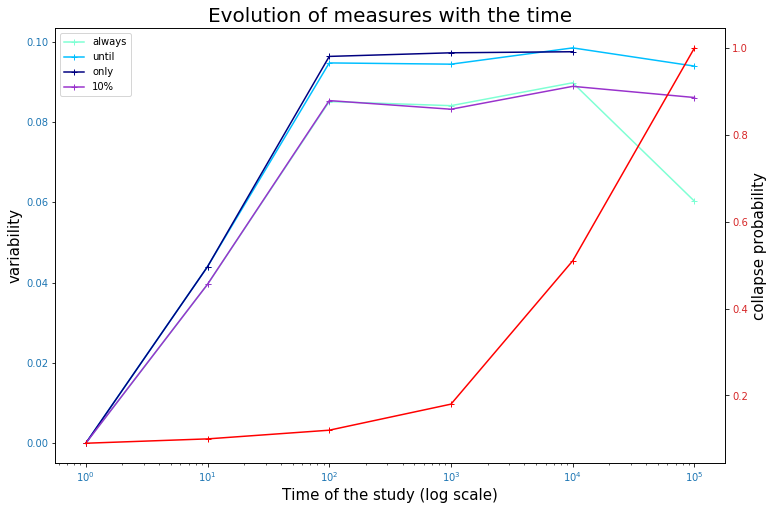

In [19]:
plt.figure(figsize=(12, 8))

plt.semilogx(FinalTime, Variability_always, "+-", label="always", color = "aquamarine")
plt.semilogx(FinalTime, Variability_until, "+-", label="until", color = "deepskyblue")
plt.semilogx(FinalTime, Variability_only, "+-", label="only", color = "navy")
plt.semilogx(FinalTime, Variability_10, "+-", label="10%", color = "darkorchid")
plt.xlabel("Time of the study (log scale)", fontsize=15)
plt.ylabel("variability", fontsize=15)
plt.legend()
plt.tick_params(labelcolor = 'tab:blue')

plt.twinx()    
plt.semilogx(FinalTime, Collapse, "+-", label="collapse probability", color = "red")
plt.tick_params(labelcolor = 'tab:red')    
plt.xlabel("Time of the study (log scale)", fontsize=15)
plt.ylabel("collapse probability", fontsize=15)


plt.title("Evolution of measures with the time", fontsize=20)
plt.savefig("plot/measures/Measures_over_time")
plt.show()

### Study of the impact of fire frequency

In [22]:
Freq = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

finalTime = 500

Collapse = np.zeros(len(Freq))
Variability_always = np.zeros_like(Collapse)
Variability_until = np.zeros_like(Collapse)
Variability_only = np.zeros_like(Collapse)
Variability_10 = np.zeros_like(Collapse)

for i, freq in enumerate(Freq):
    Param_freq = {"p":freq}
    Fire["param_freq"] = Param_freq
    Collapse[i], Variability_always[i], Variability_until[i], Variability_only[i], Variability_10[i] = all_measure(Number_of_simulation = 100, Fire = Fire, finalTime = finalTime) 

/home/azer/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/azer/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/azer/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/azer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


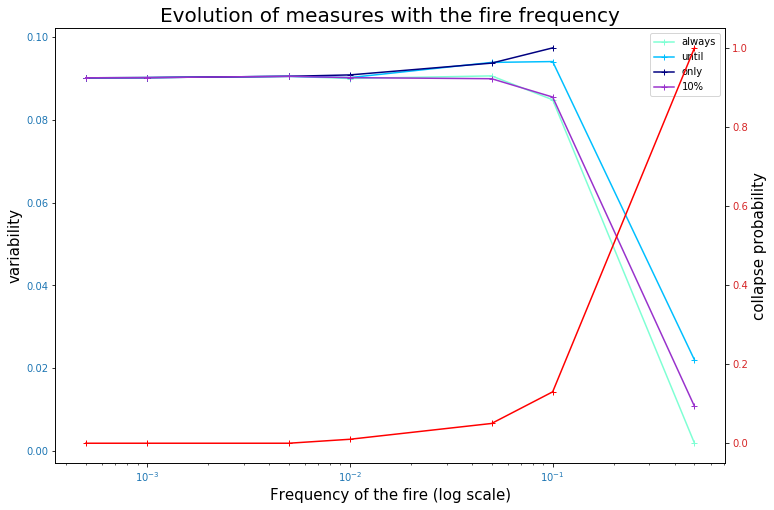

In [27]:
plt.figure(figsize=(12, 8))

plt.semilogx(Freq, Variability_always, "+-", label="always", color = "aquamarine")
plt.semilogx(Freq, Variability_until, "+-", label="until", color = "deepskyblue")
plt.semilogx(Freq, Variability_only, "+-", label="only", color = "navy")
plt.semilogx(Freq, Variability_10, "+-", label="10%", color = "darkorchid")
plt.xlabel("Frequency of the fire (log scale)", fontsize=15)
plt.ylabel("variability", fontsize=15)
plt.legend()
plt.tick_params(labelcolor = 'tab:blue')

plt.twinx()    
plt.semilogx(Freq, Collapse, "+-", label="collapse probability", color = "red")
plt.tick_params(labelcolor = 'tab:red')    
plt.xlabel("Frequency of the fire (log scale)", fontsize=15)
plt.ylabel("collapse probability", fontsize=15)


plt.title("Evolution of measures with the fire frequency", fontsize=20)
plt.savefig("plot/measures/Measures_over_frequency")
plt.show()

# cp over variability ========= INCREASE Number_of_simulation ???

In [34]:
Freq = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

finalTime = 500
Number_of_simulation = 100
Collapse = np.zeros((len(Freq), Number_of_simulation))
Variability_always = np.zeros_like(Collapse)
Variability_until = np.zeros_like(Collapse)
Variability_only = np.zeros_like(Collapse)
Variability_10 = np.zeros_like(Collapse)

for i, freq in enumerate(Freq):
    Param_freq = {"p":freq}
    Fire["param_freq"] = Param_freq
    Collapse[i], Variability_always[i], Variability_until[i], Variability_only[i], Variability_10[i] = all_measure(Number_of_simulation = Number_of_simulation, mean = False, Fire = Fire, finalTime = finalTime) 

/home/azer/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/azer/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/azer/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


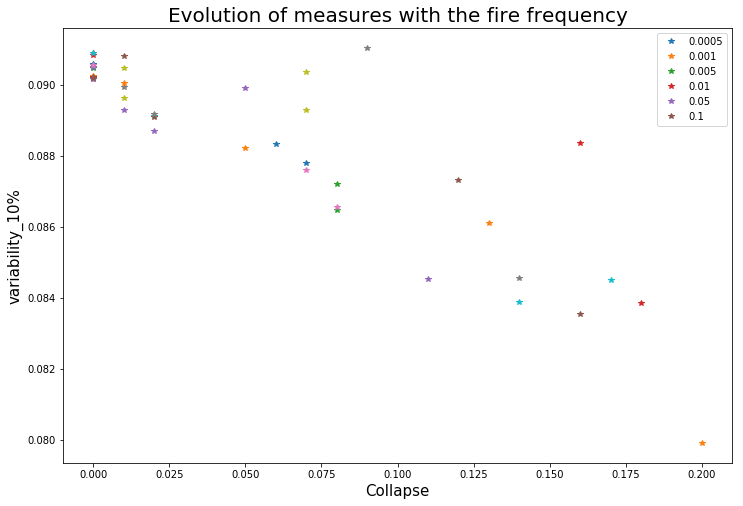

In [45]:
plt.figure(figsize=(12, 8))

numbreDePoint = 10
for j in range(numbreDePoint):
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire["param_freq"] = Param_freq
        Collapse[i], Variability_always[i], Variability_until[i], Variability_only[i], Variability_10[i] = all_measure(Number_of_simulation = Number_of_simulation, mean = False, Fire = Fire, finalTime = finalTime) 
    for i, freq in enumerate(Freq[:-1]):
        if(j==0):
            plt.plot(np.nanmean(Collapse[i]), np.nanmean(Variability_10[i]), "*", label=str(freq))
        else:
            plt.plot(np.nanmean(Collapse[i]), np.nanmean(Variability_10[i]), "*")
    
plt.xlabel("Collapse", fontsize=15)
plt.ylabel("variability_10%", fontsize=15)
plt.legend()

plt.title("Variability over collapse for different frequency", fontsize=20)
plt.savefig("plot/measures/variability_over_collapse")
plt.show()

### measures over amplitude (here number of simulation = 1000)

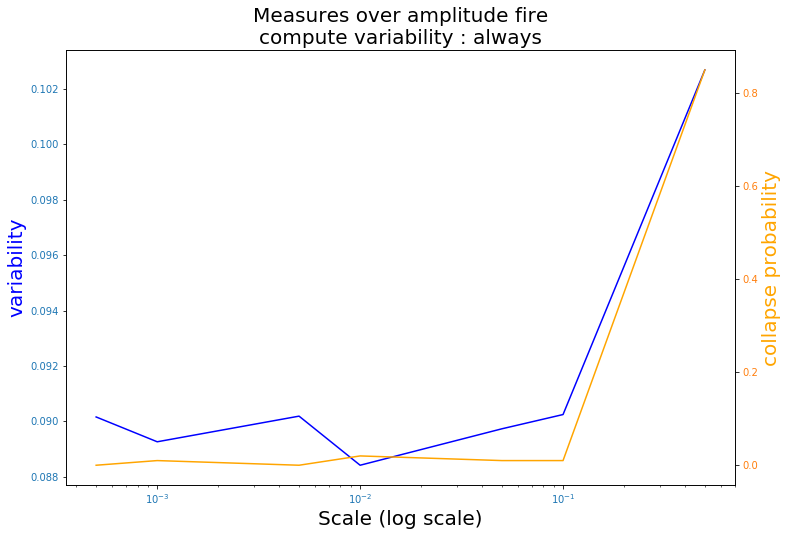

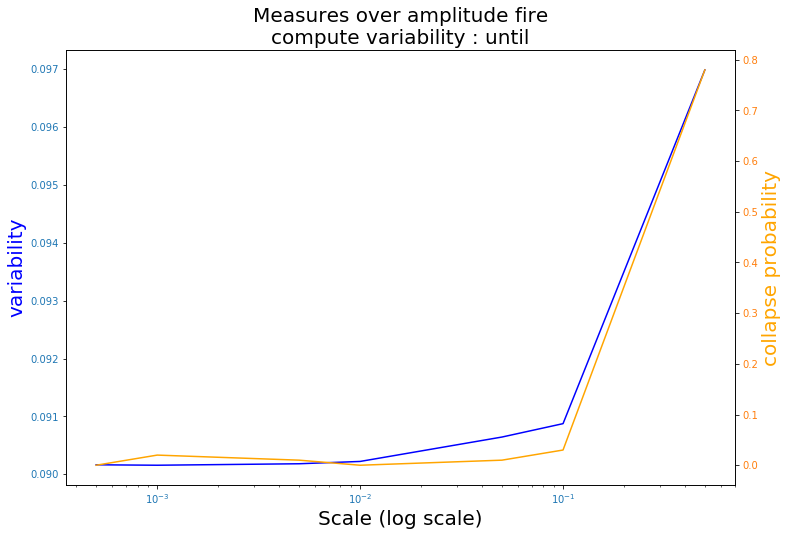

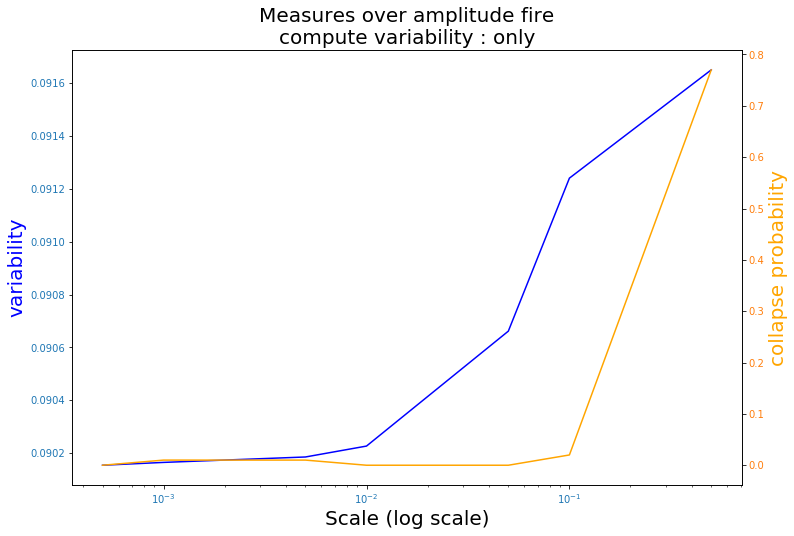

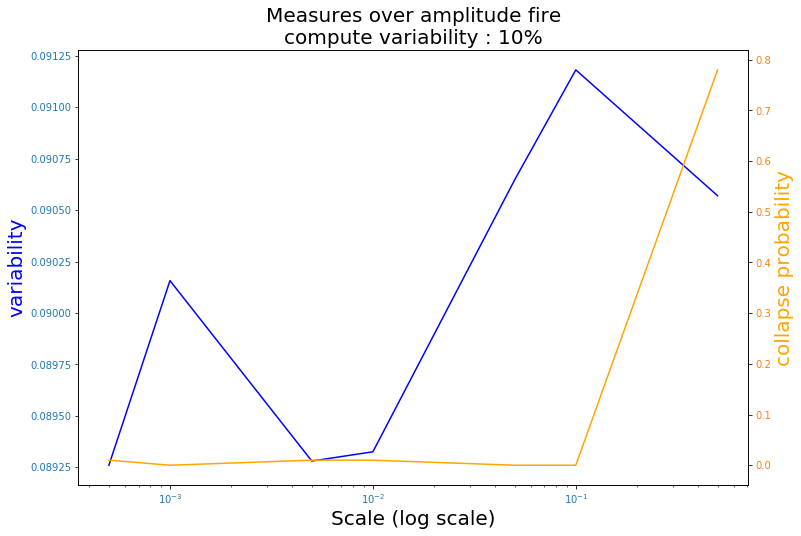

In [99]:
exec(open("objet.py").read(), globals())

Ampl = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

for j, compute_variability in enumerate(Compute_variability):
    V = []
    C = []
    for i, ampl in enumerate(Ampl):
        Param_ampl = {"scale":ampl}
        Fire["param_amplitude"] = Param_ampl
        v, c = measure(Number_of_simulation = 100, compute_variability = compute_variability, Fire = Fire) ############# modifier objet, au début et à perturbation"
        V += [v]
        C += [c]
    plt.figure(figsize=(12, 8))
#    plt.subplot(2,2,j+1)
    plt.semilogx(Ampl, V, "b", label="variability")
    plt.ylabel("variability", color="blue", fontsize=20)
    plt.xlabel("Scale (log scale)", fontsize=20)
    plt.tick_params(labelcolor = 'tab:blue')

    plt.twinx()    
    plt.semilogx(Ampl, C, "orange", label="collapse probability")
    plt.tick_params(labelcolor = 'tab:orange')    
    plt.xlabel("Scale (log scale)", fontsize=20)
    plt.ylabel("collapse probability", color = "orange", fontsize=20)
    
    plt.title("Measures over amplitude fire\ncompute variability : "+compute_variability, fontsize=20)
    plt.savefig("plot/measures/Measures_over_amplitude_fire_compute_variability_"+compute_variability)
    plt.show()

## Impact of both freq and scale

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


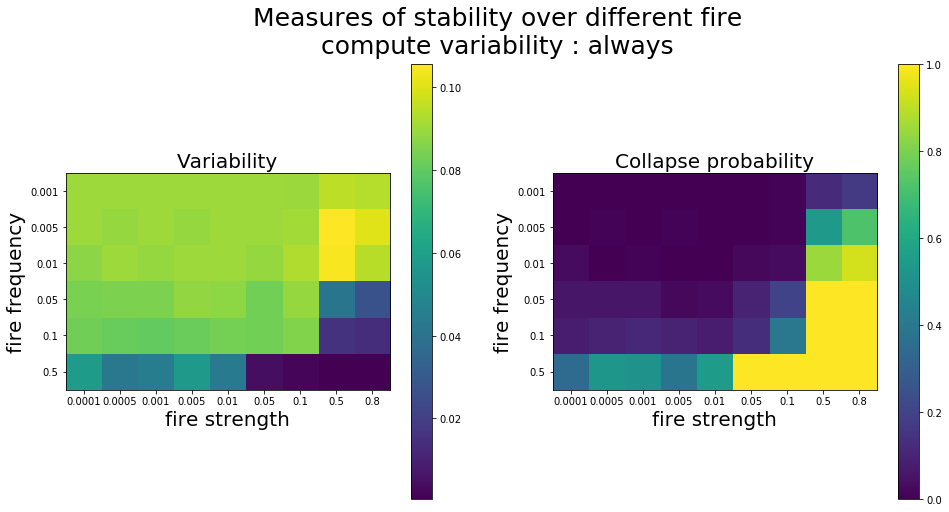

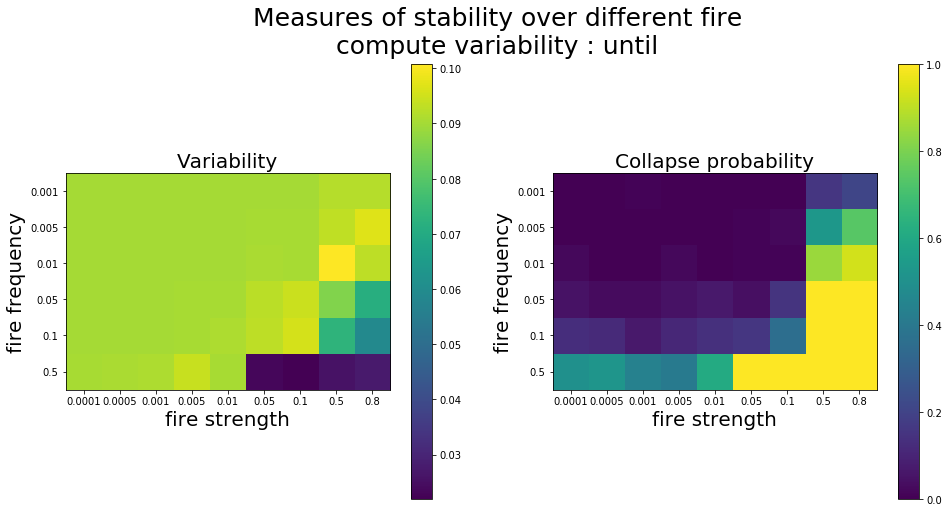

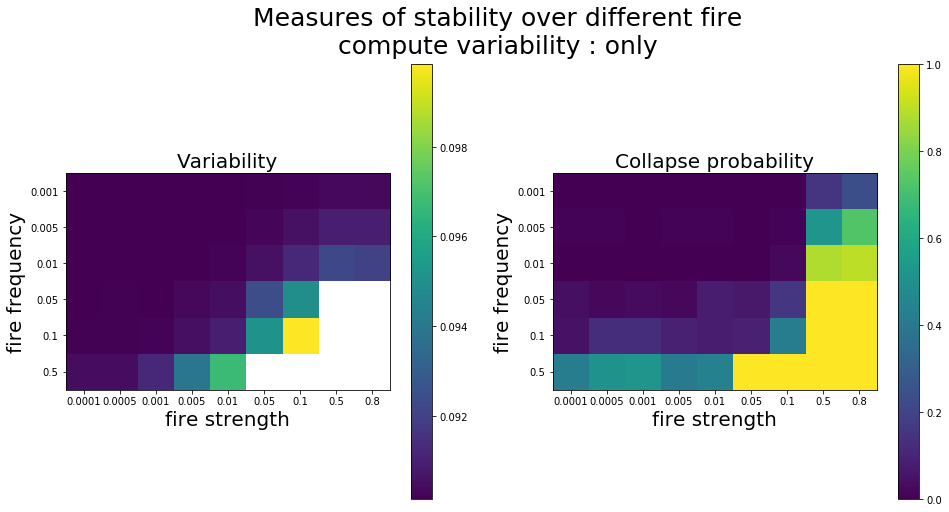

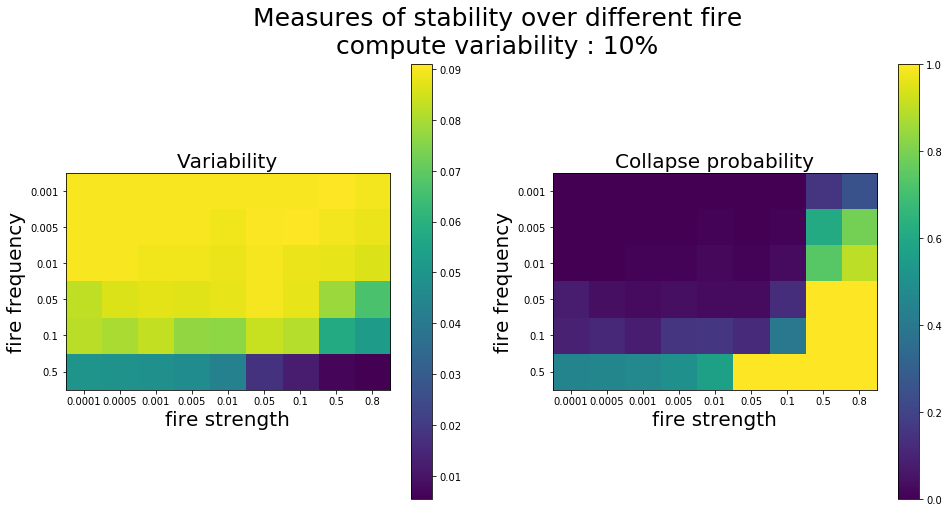

In [98]:
Freq = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
Ampl = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.8]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

for j, compute_variability in enumerate(Compute_variability):
    V = np.zeros((len(Freq), len(Ampl)))
    C = np.zeros_like(V)
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire["param_freq"] = Param_freq
        for j, ampl in enumerate(Ampl):
            Param_ampl = {"scale":ampl}
            Fire["param_amplitude"] = Param_ampl
            v, c = measure(Number_of_simulation = 100, compute_variability = compute_variability, Fire = Fire) #############" modifier objet, au début et à perturbation"
            V[i,j] = v
            C[i,j] = c
    plt.figure(figsize = (16, 8))
    plt.suptitle("Measures of stability over different fire\ncompute variability : "+compute_variability, fontsize=25)

    plt.subplot(1,2,1)
    plt.imshow(V)
    plt.xticks(np.arange(len(Ampl)), Ampl)
    plt.yticks(np.arange(len(Freq)), Freq)
    plt.colorbar()
    plt.title("Variability", fontsize=20)
    plt.ylabel("fire frequency", fontsize=20)
    plt.xlabel("fire strength", fontsize=20)

    plt.subplot(1,2,2)
    plt.imshow(C)
    plt.xticks(np.arange(len(Ampl)), Ampl)
    plt.yticks(np.arange(len(Freq)), Freq)
    plt.colorbar()
    plt.title("Collapse probability", fontsize=20)
    plt.ylabel("fire frequency", fontsize=20)
    plt.xlabel("fire strength", fontsize=20)
    
    plt.savefig("plot/measures/Measures_over_freq_amplitude_compute_variability_"+compute_variability)

    #plt.savefig("plot/Measures_freq_ampl_2")